# Unsupervised ML Model Evaluation for Wine Classification Data Set

### Group 8:  
#### Members: Teofilo Chichume, Aaron Verive, Mariano Viola and Peter Diao

### Project Name: ML Model for Wine Type Classification

> **Summary of Project Goal**: The goal of this evaluation was to train and evaluate 3 unsupervised ML models for classifying a wine data set that contained 13 different chemical features. The 3 unsupervised ML models trained were as follows: 1) K-Means cluster, 2) Agglomerative Heirarchical Clustering (AHC) and 3) Gaussian Mixture Model (GMM). Each model was evaluated based on the following criteria: a) how well-defined were each of the cluster boundaries generated by the ML model, b) how stable were the group of clusters produced by the ML model, c) what was the silhouette score generated by the ML model, and d) the pros (advantages) and cons (disadvantages) of each model. 

> **Evaluation Results**: 
    -The results of our analysis shows that K-Means clustering produced the best overall result in terms of the silhouette score, how clearly defined the cluster boundaries were and the relative stability of the cluster boundaries generated by each model. 
    - ***Silhouette Score***: K-Means cluster had by far the highest silhouette score (0.56) relative to the Gaussian Mixture Model (0.282) and the Agglomerative Hierarchical Clustering model (0.281). 
    - ***Clarity of Cluster Boundaries***: K-Means produced 3 clearly defined cluster boundaries (see Figure 1), whereas GMM produced a mixed cluster boundary (see Figure 2) and AHC also generated a mixed cluster boundary (see Figure 3).
    - ***Stability of Cluster Boundaries***: K-Means selects the number of cluster boundaries using the Elbow Method which is then used to initialize the K-Means model. This method is effective in stabilizing the boundary clusters because it calculates a probability of either "1" or "0" in selecting which cluster the data point is grouped with. This binary outcome is called a hard or a crisp cluster. On the other hand, both GMM and AHC model calculates a range of probabilities (from 0 to 1) when grouping each data point to a cluster. This is called a soft or fuzzy clustering method and can cause the cluster boundary and the resulting silhouette score to shift with a relative change in the data point's variance. Figure 4 shows the instability of GMM when initializing the number of clusters. GMM uses 2 methods for selecting the initial number of cluster groups: the AIC (Akaike's Information Criteria) method and the BIC (Bayesian Information Criteria) method. Figure 4 shows the wide divergence of both methods after 2 cluster groups on the x-axis. 
    - ***Pros and Cons of K-Means***: If you're looking for a deterministic model that predicts with a certainty of "1" or "0" that a certain data point belongs to a specific cluster, then K-Means would be the appropriate model to choose. The cluster boundaries are stable. A disadvantage of the K-Means is that the user has to guess the number of clusters when initializing the model. While the Elbow method is often used, the elbow curve tends to exhibit more than one bend. This means the number of clusters is not certain.
    - ***Pros and Cons of Gaussian Mixture Model***: If you're looking for a model that can give you the probability (based on a standard Gaussian distribution) that a data point belongs to a certain cluster, then the GMM is the appropriate model. The GMM also generates the parameters of the data point (means, weights and covariances) which can be useful. However, the cluster boundaries may not be clearly defined and may be unstable. 
    - ***Pros and Cons of the Agglomerative Hierarchical Clustering Model***: One major advantage of the AHC model is that it generates a dendrogram which shows each individual sub-grouping and grouping of every data point in the data set. The disadvantage is that the number of sub-groups and groups tend to vary depending on where you "slice" the dendrogram. For example the dendrogram generated by the AHC model (see Figure 5) produces 4 sub-groups when you slice the y-axis at 10, 3 sub-groups when the y-axis is sliced at 20 and 2 sub-groups when the y-axis is sliced at 30. This shows how unstable the cluster boundaries can be of the AHC model.

> **Concluding Remarks**: All 3 unsupervised ML models tend to exhibit low silhouette scores: from 0.281 to 0.56. This is mainly due to the structural constraints of the model parameters as it relates to the wine data set. That is, each model was a two-dimensional (2-D) model that was projected on to a data set with 13 dimensions (i.e., 13 features). This means that the 13-D wine classification data set is not linearly separable in a reduced 2-dimensional space (i.e., insufficient hyper-parameters). We believe that the silhouette scores, cluster boundary definitions and cluster boundary stability could show significant improvement when working with higher 3-D, or 4-D ML models. However, that is beyond the scope of this project.

# 1. Exploratory Data Analysis

In [1]:
# Importing important libraries that help our analysis
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# Reading the dataset
filepath = "Wine-Clustering.csv"
df = pd.read_csv(filepath)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Check the Wine data set for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
# Scaling the dataset
sc=StandardScaler()
df[df.columns]=sc.fit_transform(df)

In [5]:
# Exploring the data after scaling
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


#### The Histogram
The Histograms below shows the distributions of  13 constituents after scalling the dataset.

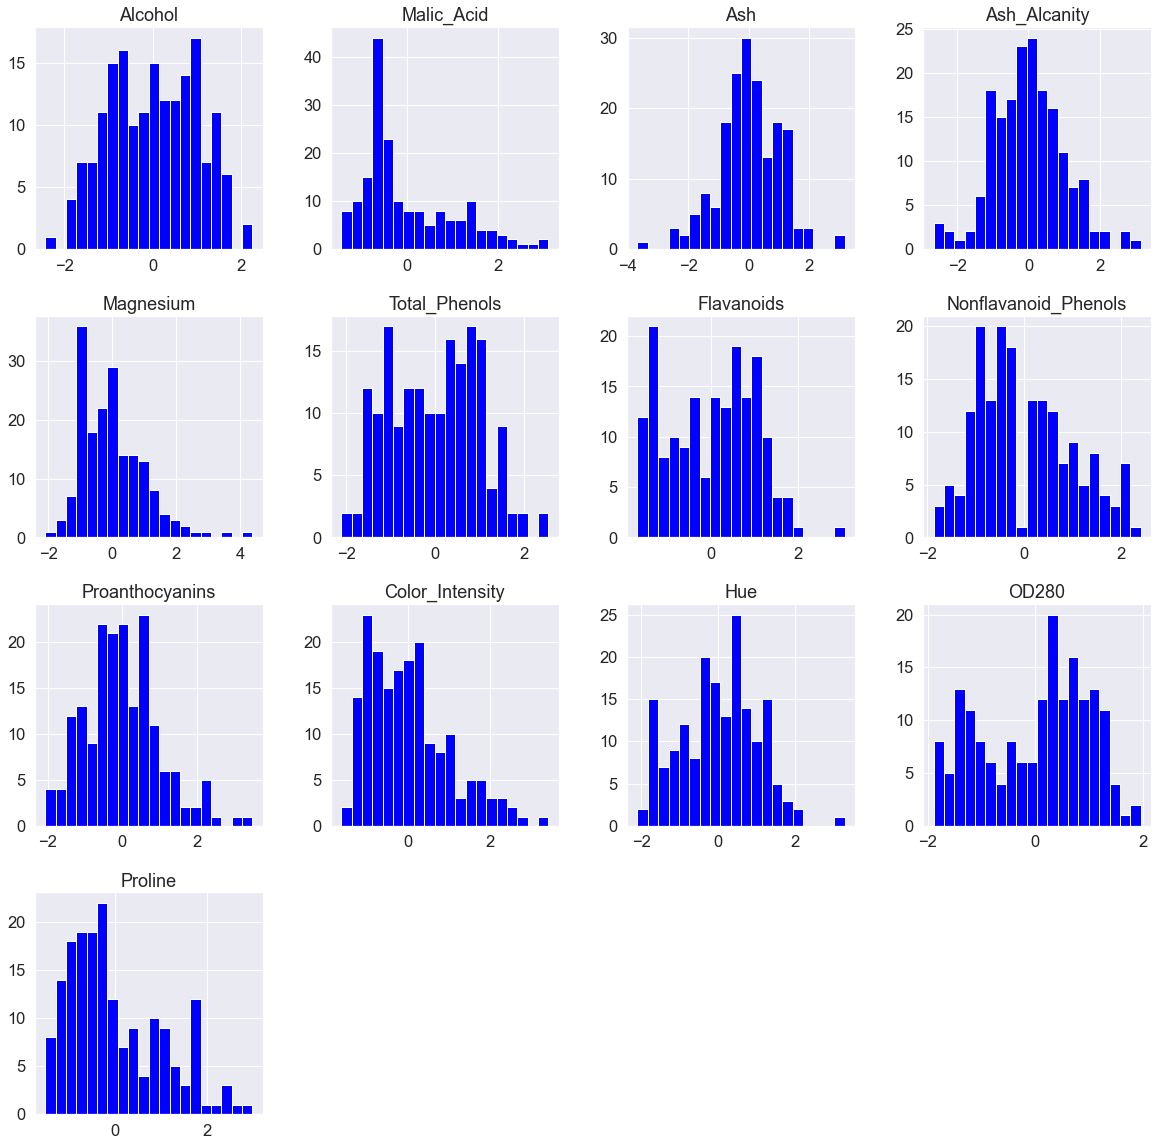

In [6]:
sns.set(style="darkgrid", font_scale=1.5, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20, color="blue")

### 2. Model selection, training, and finalization 

####  2A. K-Means Model

##### Elbow Method
First of all, we are going to choose the number of cluster by elbow method).
Inertia is sum of squared distances of samples to their closest cluster center. And the Elbow method looks at the inertia as a function of the number of clusters. One should choose a number of clusters so that adding another cluster doesn’t improve much better the inertia.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


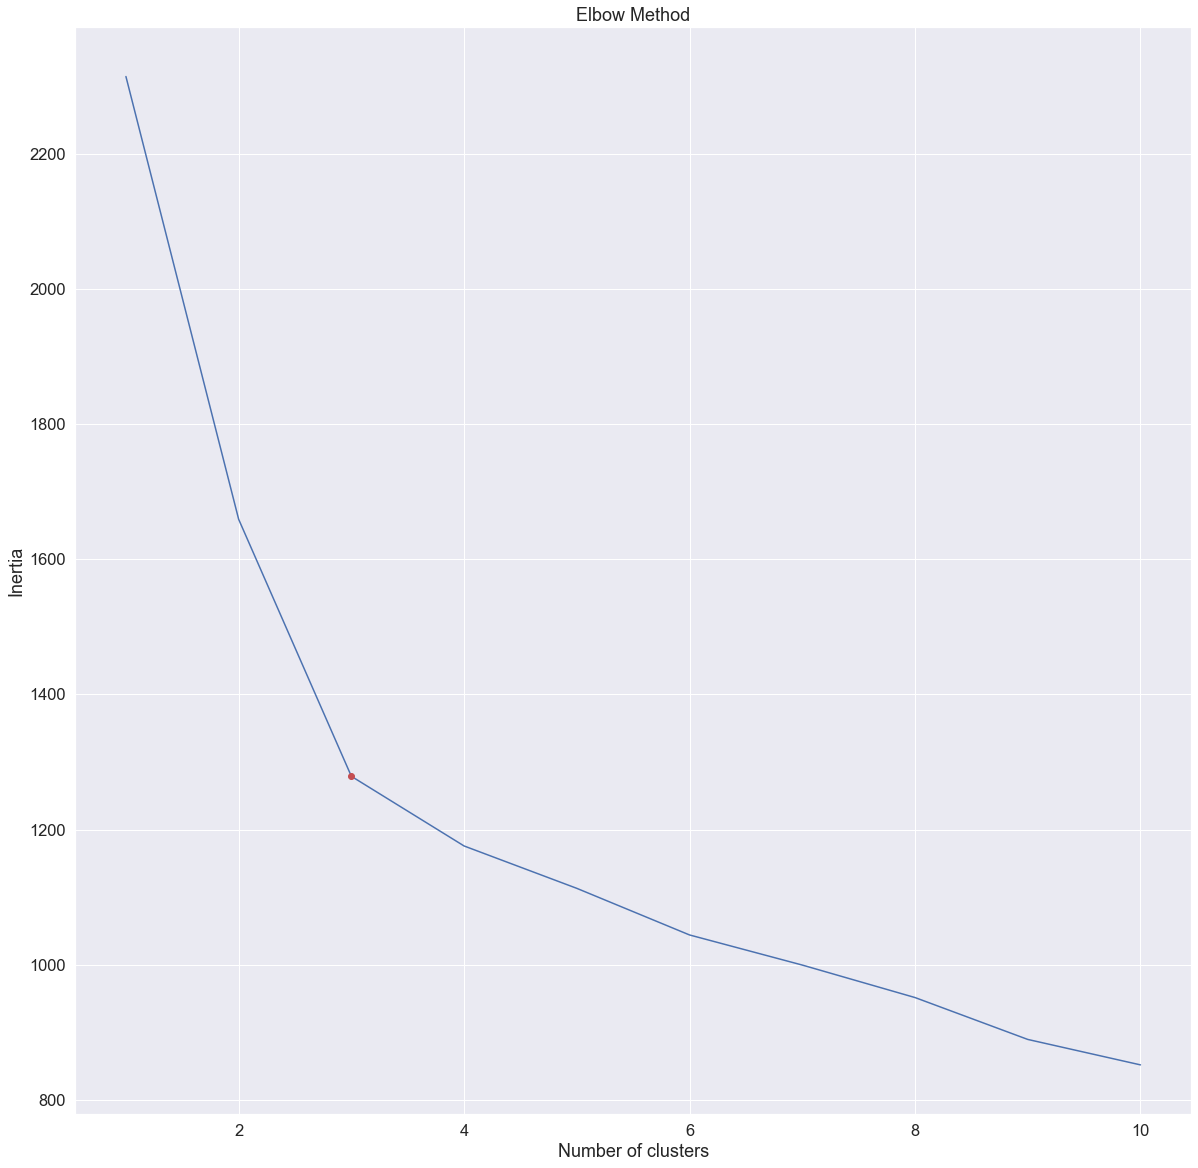

In [7]:
#Elbow Method
seed = 0
elbow = dict()
for k in range(1,11):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(df)
    inertia = estimator.inertia_
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.plot(3,elbow_df[3],'ro')

In [8]:
KM = KMeans(n_clusters = 3, random_state=seed)
res = KM.fit_predict(df)

label_pred_KM = KM.labels_
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)

centroids_KM= KM.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

inertia_KM = KM.inertia_
print("Inertia:",inertia_KM)

Labels predicted by K-Means: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Length of labels is same as data entry (178,)
Shape of centroids_KM (3, 13)
Centroids: [[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]
Inertia: 1278.7607763668145


In [9]:
# Applying K-Means
kmeans= KMeans(n_clusters=3, random_state=17, init='k-means++')
kmeans_labels= kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

In [10]:
pca = PCA(n_components=2)
transf_data = pca.fit_transform(df)
principalDf = pd.DataFrame(data = transf_data
             , columns = ['PCA 1', 'PCA 2'])

In [11]:
"""
  To compare the centroid vectors of each group of a PCA we looking for a method to calculate
  the centroids for each PC and group.
"""
centroids_pca = pca.transform(centroids)
pd.Series(kmeans_labels).value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


2    65
1    62
0    51
dtype: int64

In [12]:
centroids_df = pd.DataFrame(sc.inverse_transform(centroids), columns= df.columns)
centroids_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


Text(0.5, 1.0, 'Figure 1: Clustered Data')

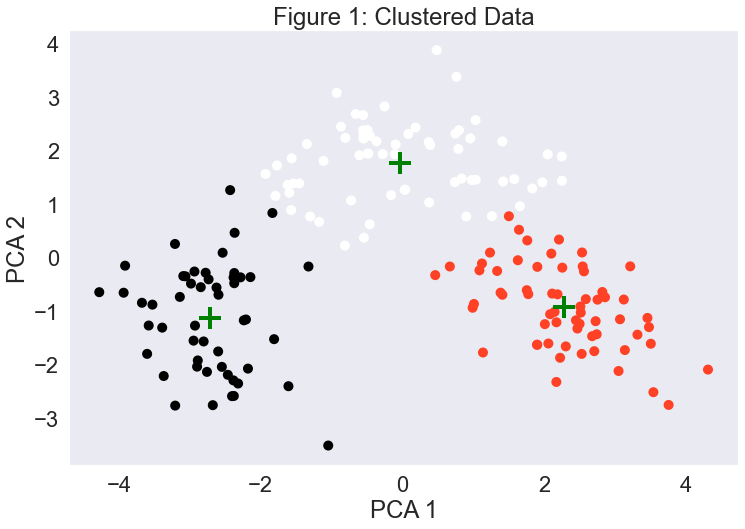

In [13]:
# There are 3 Clusters seen separated clearly
sns.set(style='dark', rc={'figure.figsize':(12,8)},font_scale=2)
plt.scatter(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], c=kmeans_labels, cmap="CMRmap", lw=4)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="+", s=500, linewidths=3, lw=4, color="green", zorder=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Figure 1: Clustered Data")

In [14]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(principalDf, kmeans.labels_, metric='euclidean')
silhouette

0.5583363740907525

In this case 0.56 score means that model did well on create the 3 clusters boundary.

### K-Means Model Results and Interpretation

 -The results of our analysis shows that K-Means clustering produced the best overall result in terms of the silhouette score, how clearly defined the cluster boundaries were and the relative stability of the cluster boundaries generated by each model. 
    - ***Silhouette Score***: K-Means cluster had a higher silhouette score (0.558) relative to the Gaussian Mixture Model (0.282) and the Agglomerative Hierarchical Clustering model (0.280). 
    - ***Clarity of Cluster Boundaries***: K-Means produced 3 clearly defined cluster boundaries (see Figure 1), whereas GMM produced a mixed cluster boundary (see Figure 2) and AHC also generated a mixed cluster boundary (see Figure 3).
    - ***Stability of Cluster Boundaries***: K-Means selects the number of cluster boundaries using the Elbow Method which is then used to initialize the K-Means model. This method is effective in stabilizing the boundary clusters because it calculates a probability of either "1" or "0" in selecting which cluster the data point is grouped with. This binary outcome is called a hard or a crisp cluster. On the other hand, both GMM and AHC model calculates a range of probabilities (from 0 to 1) when grouping each data point to a cluster. This is called a soft or fuzzy clustering method and can cause the cluster boundary and the resulting silhouette score to shift with a relative change in the data point's variance. Figure 4 shows the instability of GMM when initializing the number of clusters. GMM uses 2 methods for selecting the initial number of cluster groups: the AIC (Akaike's Information Criteria) method and the BIC (Bayesian Information Criteria) method. Figure 4 shows the wide divergence of both methods after 2 cluster groups on the x-axis. 
    - ***Pros and Cons of K-Means***: If you're looking for a deterministic model that predicts with a certainty of "1" or "0" that a certain data point belongs to a specific cluster, then K-Means would be the appropriate model to choose. The cluster boundaries are stable. A disadvantage of the K-Means is that the user has to guess the number of clusters when initializing the model. While the Elbow method is often used, the elbow curve tends to exhibit more than one bend. This means the number of clusters is not certain.

### 2B. Gaussian Mixture Model (GMM)

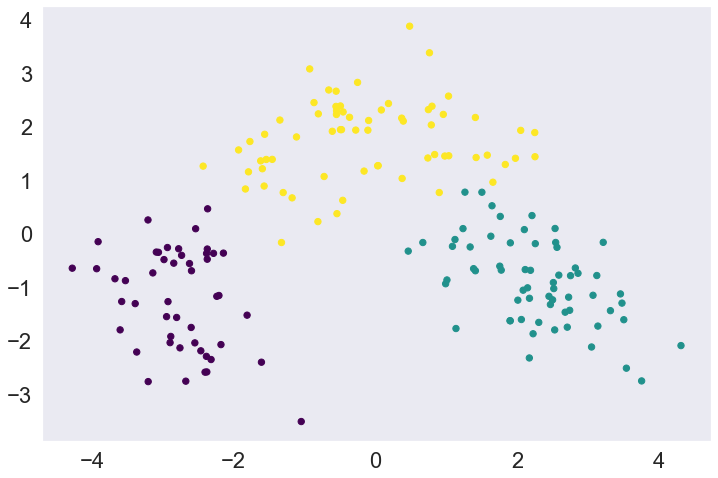

In [30]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(principalDf)
gmm_labels = gmm.predict(principalDf)
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=gmm_labels, s=40, cmap='viridis');
# print(probs[:5].round(3))

In [31]:
gmm_silhouette_score=metrics.silhouette_score(df, gmm_labels, metric='euclidean')
gmm_silhouette_score

0.28206924156869057

**Figure 2: GMM Scatter Plot of Wine class data set**

In [32]:
#Predict the Probability
probs = gmm.predict_proba(principalDf)
probs[0,:]
props = probs.round(6)
print(probs)

[[2.86925966e-23 9.99999851e-01 1.49363924e-07]
 [2.77926083e-18 9.74647677e-01 2.53523230e-02]
 [1.59369453e-18 9.99990996e-01 9.00385458e-06]
 [2.21575956e-24 1.00000000e+00 8.08228835e-12]
 [2.17520277e-09 9.97515115e-01 2.48488300e-03]
 [1.99705699e-20 9.99999996e-01 3.88568760e-09]
 [7.04983991e-18 9.99995180e-01 4.81984181e-06]
 [1.16433910e-14 9.99998232e-01 1.76813799e-06]
 [1.20977619e-18 9.99982892e-01 1.71080633e-05]
 [2.20400160e-20 9.99977363e-01 2.26368708e-05]
 [1.45068037e-24 9.99999701e-01 2.99333275e-07]
 [2.54911990e-14 9.99473074e-01 5.26925792e-04]
 [1.87183958e-16 9.99847114e-01 1.52885680e-04]
 [1.24609852e-24 9.99999013e-01 9.86715198e-07]
 [2.07182690e-29 1.00000000e+00 3.28665665e-10]
 [3.58430576e-16 9.99999437e-01 5.62653579e-07]
 [4.27942884e-14 9.99999965e-01 3.45862210e-08]
 [1.38323504e-13 9.99997056e-01 2.94406886e-06]
 [3.15668619e-23 1.00000000e+00 7.46527287e-11]
 [1.04135457e-15 9.99976198e-01 2.38022553e-05]
 [8.23041113e-23 9.99986170e-01 1.383037

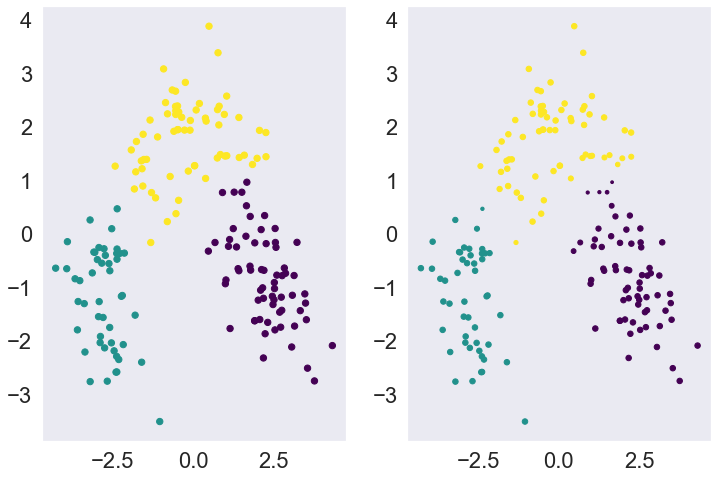

In [33]:
#Visualize the effect of the 2 probabilities:
size = 30 * probs.max(1) ** 2 #square emphasizes differences
plt.subplot(121)
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=labels, s=40, cmap='viridis')
plt.subplot(122)
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=labels, cmap= 'viridis', s=size)

In [34]:
#Look for parameters
gmm.means_

array([[-2.76683661, -1.24028998],
       [ 2.24927079, -0.8696415 ],
       [-0.16509351,  1.72663129]])

In [35]:
gmm.weights_

array([0.26872195, 0.35795716, 0.37332089])

In [36]:
gmm.covariances_

array([[[ 0.38131981, -0.17140501],
        [-0.17140501,  0.87794943]],

       [[ 0.64299296, -0.36033445],
        [-0.36033445,  0.70032222]],

       [[ 1.32564109,  0.15932552],
        [ 0.15932552,  0.57137284]]])

In [37]:
#AIC and BIC for determining optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(df)
    Sum_bic.append(gmm.bic(df))
    Sum_aic.append(gmm.aic(df))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Figure 4: Wide Divergence of AIC and BIC vs Elbow Method shows Instability of Cluster Boundary Model of GMM**

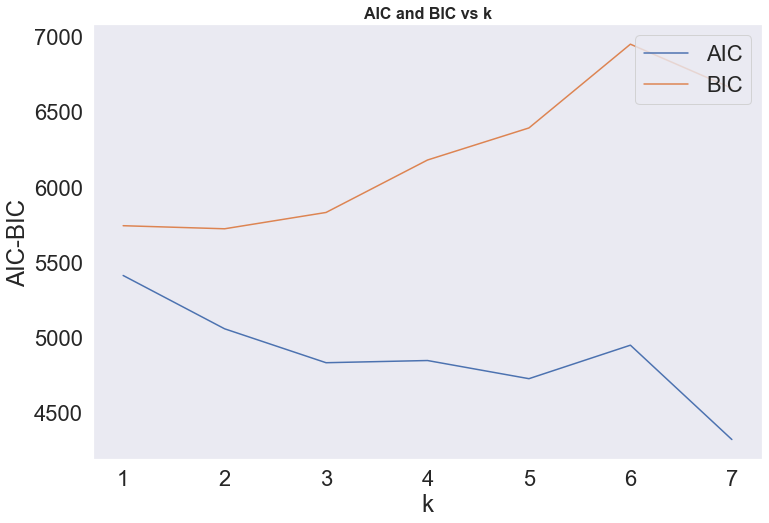

In [38]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = 'AIC')
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = 'BIC')

plt.title("AIC and BIC vs k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()

### Gaussian Mixture Model (GMM) Results and Interpretation

 **Evaluation Results**: 
    -The results of our analysis shows that K-Means clustering produced the best overall result in terms of the silhouette score, how clearly defined the cluster boundaries were and the relative stability of the cluster boundaries generated by each model. 
    - ***Silhouette Score***: K-Means cluster had a higher silhouette score (0.558) relative to the Gaussian Mixture Model (0.282) and the Agglomerative Hierarchical Clustering model (0.280). 
    - ***Clarity of Cluster Boundaries***: K-Means produced 3 clearly defined cluster boundaries (see Figure 1), whereas GMM produced a mixed cluster boundary (see Figure 2) and AHC also generated a mixed cluster boundary (see Figure 3).
    - ***Stability of Cluster Boundaries***: K-Means selects the number of cluster boundaries using the Elbow Method which is then used to initialize the K-Means model. This method is effective in stabilizing the boundary clusters because it calculates a probability of either "1" or "0" in selecting which cluster the data point is grouped with. This binary outcome is called a hard or a crisp cluster. On the other hand, both GMM and AHC model calculates a range of probabilities (from 0 to 1) when grouping each data point to a cluster. This is called a soft or fuzzy clustering method and can cause the cluster boundary and the resulting silhouette score to shift with a relative change in the data point's variance. Figure 4 shows the instability of GMM when initializing the number of clusters. GMM uses 2 methods for selecting the initial number of cluster groups: the AIC (Akaike's Information Criteria) method and the BIC (Bayesian Information Criteria) method. Figure 4 shows the wide divergence of both methods after 2 cluster groups on the x-axis. 
       - ***Pros and Cons of Gaussian Mixture Model***: If you're looking for a model than can give you the probability (based on a standard Gaussian distribution) that a data point belongs to a certain cluster, then the GMM is the appropriate model. The GMM also generates the parameters of the data point (means, weights and covariances) which can be useful. However, the cluster boundaries may not be clearly defined and may be unstable. 

### 2C. Agglomerative Hierarchical Clustering Model (AHC)

**Figure 5: AHC Dendrogram**

Text(0, 0.5, 'Euclidean distance')

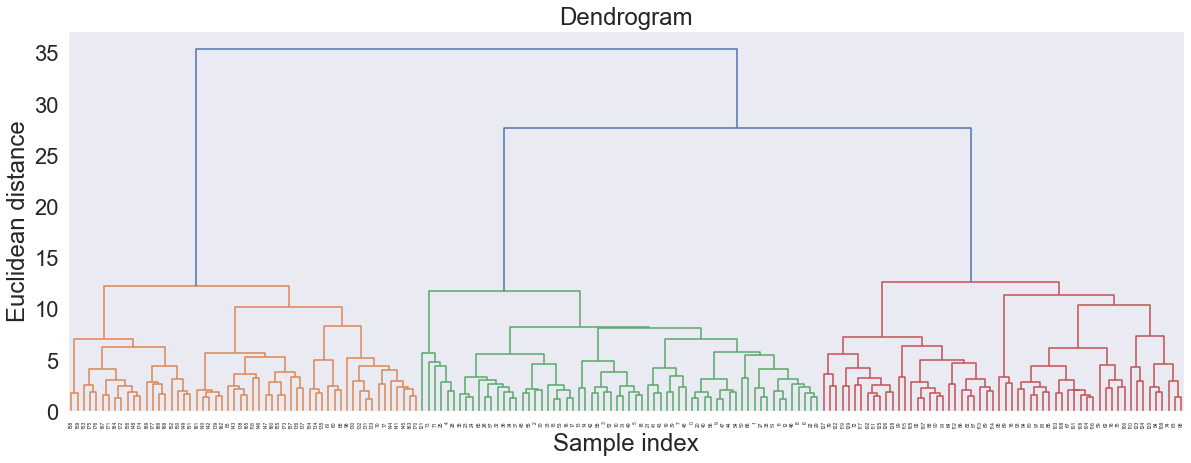

In [39]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(principalDf)
ahc_labels = cluster.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

**Figure 3: Agglomerative Hierarchical Clustering (AHC) Scatter Plot**

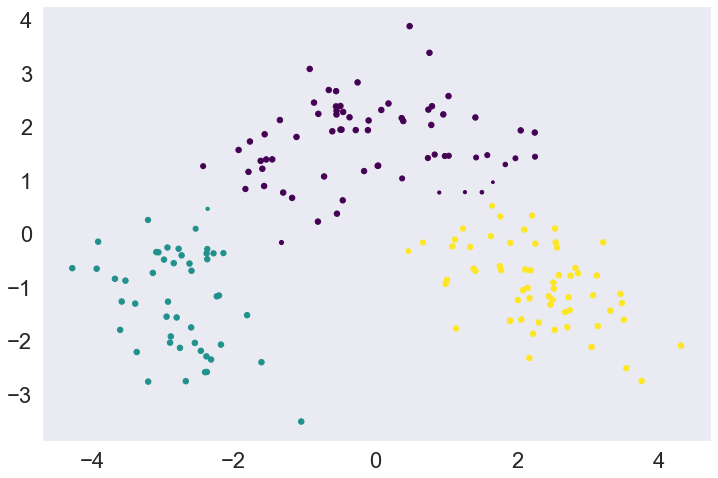

In [41]:
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=ahc_labels, cmap= 'viridis', s=size)

In [42]:
AHC_silhouette_score=metrics.silhouette_score(df, labels, metric='euclidean')
AHC_silhouette_score

0.2807914030179968

### Agglomerative Hierarchical Clustering Model (AHC) Results and Interpretation

**Evaluation Results**: 
    -The results of our analysis shows that K-Means clustering produced the best overall result in terms of the silhouette score, how clearly defined their cluster boundaries were and the relative stability of their cluster boundaries. 
    - ***Silhouette Score***: K-Means cluster had a higher silhouette score (0.558) relative to the Gaussian Mixture Model (0.282) and the Agglomerative Hierarchical Clustering model (0.281). 
    - ***Clarity of Cluster Boundaries***: K-Means produced 3 clearly defined cluster boundaries (see Figure 1), whereas GMM produced a mixed cluster boundary (see Figure 2) and AHC also generated a mixed cluster boundary (see Figure 3).
    - ***Stability of Cluster Boundaries***: K-Means selects the number of cluster boundaries using the Elbow Method which is then used to initialize the K-Means model. This method is effective in stabilizing the boundary clusters because it calculates a probability of either "1" or "0" in selecting which cluster the data point is grouped with. This binary outcome is called a hard or a crisp cluster. On the other hand, both GMM and AHC model calculates a range of probabilities (from 0 to 1) when grouping each data point to a cluster. This is called a soft or fuzzy clustering method and can cause the cluster boundary and the resulting silhouette score to shift with a relative change in the data point's variance. Figure 4 shows the instability of GMM when initializing the number of clusters. GMM uses 2 methods for selecting the initial number of cluster groups: the AIC (Akaike's Information Criteria) method and the BIC (Bayesian Information Criteria) method. Figure 4 shows the wide divergence of both methods after 2 cluster groups on the x-axis. 
      - ***Pros and Cons of the Agglomerative Hierarchical Clustering Model***: One major advantage of the AHC model is that it generates a dendrogram which shows each individual sub-grouping and grouping of every data point in the data set. The disadvantage is that the number of sub-groups and groups tend to vary depending on where you "slice" the dendrogram. For example the dendrogram generated by the AHC model (see Figure 5) produces 4 sub-groups when you slice the y-axis at 10, 3 sub-groups when the y-axis is sliced at 20 and 2 sub-groups when the y-axis is sliced at 30. This shows how unstable the cluster boundaries can be of the AHC model.

### 3. Model results and interpretation 

 **Evaluation Results**: 
    -The results of our analysis shows that K-Means clustering produced the best overall result in terms of the silhouette score, how clearly defined the cluster boundaries were and the relative stability of the cluster boundaries generated by each model. 
    - ***Silhouette Score***: K-Means cluster had a higher silhouette score (0.558) relative to the Gaussian Mixture Model (0.282) and the Agglomerative Hierarchical Clustering model (0.280). 
    - ***Clarity of Cluster Boundaries***: K-Means produced 3 clearly defined cluster boundaries (see Figure 1), whereas GMM produced a mixed cluster boundary (see Figure 2) and AHC also generated a mixed cluster boundary (see Figure 3).
    - ***Stability of Cluster Boundaries***: K-Means selects the number of cluster boundaries using the Elbow Method which is then used to initialize the K-Means model. This method is effective in stabilizing the boundary clusters because it calculates a probability of either "1" or "0" in selecting which cluster the data point is grouped with. This binary outcome is called a hard or a crisp cluster. On the other hand, both GMM and AHC model calculates a range of probabilities (from 0 to 1) when grouping each data point to a cluster. This is called a soft or fuzzy clustering method and can cause the cluster boundary and the resulting silhouette score to shift with a relative change in the data point's variance. Figure 4 shows the instability of GMM when initializing the number of clusters. GMM uses 2 methods for selecting the initial number of cluster groups: the AIC (Akaike's Information Criteria) method and the BIC (Bayesian Information Criteria) method. Figure 4 shows the wide divergence of both methods after 2 cluster groups on the x-axis. 
    - ***Pros and Cons of K-Means***: If you're looking for a deterministic model that predicts with a certainty of "1" or "0" that a certain data point belongs to a specific cluster, then K-Means would be the appropriate model to choose. The cluster boundaries are stable. A disadvantage of the K-Means is that the user has to guess the number of clusters when initializing the model. While the Elbow method is often used, the elbow curve tends to exhibit more than one bend. This means the number of clusters is not certain.
    - ***Pros and Cons of Gaussian Mixture Model***: If you're looking for a model than can give you the probability (based on a standard Gaussian distribution) that a data point belongs to a certain cluster, then the GMM is the appropriate model. The GMM also generates the parameters of the data point (means, weights and covariances) which can be useful. However, the cluster boundaries may not be clearly defined and may be unstable. 
    - ***Pros and Cons of the Agglomerative Hierarchical Clustering Model***: One major advantage of the AHC model is that it generates a dendrogram which shows each individual sub-grouping and grouping of every data point in the data set. The disadvantage is that the number of sub-groups and groups tend to vary depending on where you "slice" the dendrogram. For example the dendrogram generated by the AHC model (see Figure 5) produces 4 sub-groups when you slice the y-axis at 10, 3 sub-groups when the y-axis is sliced at 20 and 2 sub-groups when the y-axis is sliced at 30. This shows how unstable the cluster boundaries can be of the AHC model.

### References:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#examples-using-sklearn-cluster-kmeans https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#examples-using-sklearn-metrics-silhouette-score https://seaborn.pydata.org/generated/seaborn.set_style.html https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/